In [1]:
# Third-party imports
%matplotlib inline
import mxnet as mx
from mxnet import gluon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

# Download and read data

In [1]:
from utilities import read_files 
df = read_files.download_and_read_noaa_txt("ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_trend_gl.txt")

Saving file as ./co2_trend_gl.txt


In [2]:
from utilities import df_tools
data = df_tools.set_noaa_datetime_index(df)

In [3]:
data

,year,month,day,cycle,trend
2010-01-01,2010,1,1,388.29,387.24
2010-01-02,2010,1,2,388.31,387.24
2010-01-03,2010,1,3,388.32,387.25
2010-01-04,2010,1,4,388.34,387.26
2010-01-05,2010,1,5,388.36,387.27
...,...,...,...,...,...
2020-01-18,2020,1,18,412.97,411.57
2020-01-19,2020,1,19,412.99,411.58
2020-01-20,2020,1,20,413.01,411.59
2020-01-21,2020,1,21,413.03,411.60


# build dataset

In [13]:

import mxnet as mx

ctx = mx.Context("gpu")

In [16]:
mx.context.num_gpus()

0

In [15]:
freq="MS"
data = data.resample(freq).apply(lambda ser: ser.iloc[-1,])
from gluonts.dataset.common import ListDataset
training_data = ListDataset(
    [{"start": data.index[0], "target": data.cycle[:"2018-01-31 00:00:00"]}], # TODO: index in programatical way
    freq = freq
)
validation_data = ListDataset(
    [{"start": data.index[0], "target": data.cycle[:"2019-01-31 00:00:00"]}], # TODO: index in programatical way
    freq = freq
)
test_data = ListDataset(
    [{"start": data.index[0], "target": data.cycle}],
    freq = freq
)

In [12]:

from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer

estimator = DeepAREstimator(
    freq=freq, 
    prediction_length=24, 
    trainer=Trainer(epochs=100, ctx = ctx),
)
predictor = estimator.train(
    training_data=training_data,
    validation_data=validation_data
)



INFO:root:Start model training


MXNetError: [19:32:40] src/ndarray/ndarray.cc:1279: GPU is not enabled

Stack trace returned 10 entries:
[bt] (0) /home/jp4989/anaconda3/envs/nlpclass/lib/python3.6/site-packages/mxnet/libmxnet.so(+0x23d55a) [0x2b682392055a]
[bt] (1) /home/jp4989/anaconda3/envs/nlpclass/lib/python3.6/site-packages/mxnet/libmxnet.so(+0x23dbc1) [0x2b6823920bc1]
[bt] (2) /home/jp4989/anaconda3/envs/nlpclass/lib/python3.6/site-packages/mxnet/libmxnet.so(mxnet::CopyFromTo(mxnet::NDArray const&, mxnet::NDArray const&, int, bool)+0x723) [0x2b6826456623]
[bt] (3) /home/jp4989/anaconda3/envs/nlpclass/lib/python3.6/site-packages/mxnet/libmxnet.so(mxnet::imperative::PushFComputeEx(std::function<void (nnvm::NodeAttrs const&, mxnet::OpContext const&, std::vector<mxnet::NDArray, std::allocator<mxnet::NDArray> > const&, std::vector<mxnet::OpReqType, std::allocator<mxnet::OpReqType> > const&, std::vector<mxnet::NDArray, std::allocator<mxnet::NDArray> > const&)> const&, nnvm::Op const*, nnvm::NodeAttrs const&, mxnet::Context const&, std::vector<mxnet::engine::Var*, std::allocator<mxnet::engine::Var*> > const&, std::vector<mxnet::engine::Var*, std::allocator<mxnet::engine::Var*> > const&, std::vector<mxnet::Resource, std::allocator<mxnet::Resource> > const&, std::vector<mxnet::NDArray*, std::allocator<mxnet::NDArray*> > const&, std::vector<mxnet::NDArray*, std::allocator<mxnet::NDArray*> > const&, std::vector<mxnet::OpReqType, std::allocator<mxnet::OpReqType> > const&)+0x47e) [0x2b682630c59e]
[bt] (4) /home/jp4989/anaconda3/envs/nlpclass/lib/python3.6/site-packages/mxnet/libmxnet.so(mxnet::Imperative::InvokeOp(mxnet::Context const&, nnvm::NodeAttrs const&, std::vector<mxnet::NDArray*, std::allocator<mxnet::NDArray*> > const&, std::vector<mxnet::NDArray*, std::allocator<mxnet::NDArray*> > const&, std::vector<mxnet::OpReqType, std::allocator<mxnet::OpReqType> > const&, mxnet::DispatchMode, mxnet::OpStatePtr)+0x839) [0x2b68263118f9]
[bt] (5) /home/jp4989/anaconda3/envs/nlpclass/lib/python3.6/site-packages/mxnet/libmxnet.so(mxnet::Imperative::Invoke(mxnet::Context const&, nnvm::NodeAttrs const&, std::vector<mxnet::NDArray*, std::allocator<mxnet::NDArray*> > const&, std::vector<mxnet::NDArray*, std::allocator<mxnet::NDArray*> > const&)+0x38c) [0x2b682631217c]
[bt] (6) /home/jp4989/anaconda3/envs/nlpclass/lib/python3.6/site-packages/mxnet/libmxnet.so(+0x2b34989) [0x2b6826217989]
[bt] (7) /home/jp4989/anaconda3/envs/nlpclass/lib/python3.6/site-packages/mxnet/libmxnet.so(MXImperativeInvokeEx+0x6f) [0x2b6826217f7f]
[bt] (8) /home/jp4989/anaconda3/envs/nlpclass/lib/python3.6/lib-dynload/../../libffi.so.6(ffi_call_unix64+0x4c) [0x2b67ebac6ec0]
[bt] (9) /home/jp4989/anaconda3/envs/nlpclass/lib/python3.6/lib-dynload/../../libffi.so.6(ffi_call+0x22d) [0x2b67ebac687d]



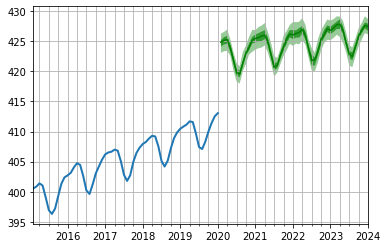

In [8]:

from gluonts.dataset.util import to_pandas

for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
    to_pandas(test_entry)[-60:].plot(linewidth=2)
    forecast.plot(color='g', prediction_intervals=[50.0, 90.0])
plt.grid(which='both')

In [9]:
from gluonts.model.simple_feedforward import SimpleFeedForwardEstimator
from gluonts.trainer import Trainer

INFO:root:Using CPU


In [10]:
estimator1 = SimpleFeedForwardEstimator(
    num_hidden_dimensions=[100],
    prediction_length=24,
    context_length=100,
    freq=freq,
    trainer=Trainer(ctx="cpu", 
                    epochs=100, 
                    learning_rate=1e-3, 
                    num_batches_per_epoch=100
                   )
)

In [11]:
predictor1 = estimator1.train(training_data)

INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 100/100 [00:00<00:00, 130.86it/s, avg_epoch_loss=5.97]
INFO:root:Epoch[0] Elapsed time 0.766 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=5.966504
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:00<00:00, 134.21it/s, avg_epoch_loss=5.09]
INFO:root:Epoch[1] Elapsed time 0.747 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=5.094025
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:00<00:00, 133.36it/s, avg_epoch_loss=4.87]
INFO:root:Epoch[2] Elapsed time 0.752 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=4.866150
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:00<00:00, 133.28it/s, avg_epoch_loss=4.74]
INFO:root:Epoch[3] Elapsed time 0.752 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=4.740391
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:00<00:00, 133.63it/s, 

INFO:root:Epoch[73] Learning rate is 0.0005
100%|██████████| 100/100 [00:00<00:00, 133.96it/s, avg_epoch_loss=2.5]
INFO:root:Epoch[73] Elapsed time 0.748 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=2.501807
INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 100/100 [00:00<00:00, 133.70it/s, avg_epoch_loss=2.58]
INFO:root:Epoch[74] Elapsed time 0.750 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=2.583663
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:00<00:00, 134.50it/s, avg_epoch_loss=2.42]
INFO:root:Epoch[75] Elapsed time 0.745 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=2.419708
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:00<00:00, 133.58it/s, avg_epoch_loss=2.44]
INFO:root:Epoch[76] Elapsed time 0.751 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=2.444269
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:00<00:00, 133.67it/s, avg_epoch_loss

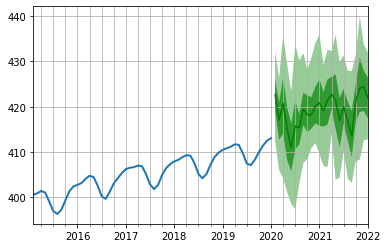

In [12]:

from gluonts.dataset.util import to_pandas

for test_entry, forecast in zip(test_data, predictor1.predict(test_data)):
    to_pandas(test_entry)[-60:].plot(linewidth=2)
    forecast.plot(color='g', prediction_intervals=[50.0, 90.0])
plt.grid(which='both')